In [2]:
import pandas as pd
import requests
import json
import csv
import time
import datetime

In [11]:
def get_timestamp(date, month, year, hour, minute, second):
    dt = datetime.datetime(year, month, date, hour, minute, second)
    utc_timestamp = dt.timestamp()
    return int(utc_timestamp)

In [17]:
from datetime import datetime

def convert_to_timestamp(utc):
    time = datetime.utcfromtimestamp(utc)
    day = time.strftime("%d")
    month = time.strftime("%m")
    year = time.strftime("%Y")
    time = time.strftime("%H:%M:%S")
    date_time = day + '/' + month + '/' + year + ', ' + time
    return "date and time: " + str(date_time)

In [5]:
def getPushshiftData(subreddit, start_timestamp, end_timestamp, limit):
    url = 'https://api.pushshift.io/reddit/search/submission/?size=' + str(limit)+ '&after=' + str(start_timestamp) + '&before=' + str(end_timestamp) + '&subreddit=' + str(subreddit)
    print(url)
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

In [241]:
subreddit_dictionary = {
    'chemistryhelp' : 'Chemistry',
    'BiologyHelp' : 'Biology',
    'PhysicsHelp' : 'Physics',
    'essayswriters' : 'English',
    'mathshelp' : 'Mathematics',
    'ComputerScienceHelp' : 'Computer Science',
    'homeworkhelper' : 'Miscellaneous',
    'assignmenthelpexpert' : 'Miscellaneous',
    'DoMyHomework247' : 'Miscellaneous',
    'AssignmentsExperts' : 'Miscellaneous',
    'Homework_Experts' : 'Miscellaneous',
    'homeworkforcashreddit' : 'Miscellaneous',
    'DoMyHomework' : 'Miscellaneous',
    'DoMyAssignments' : 'Miscellaneous',
    'stressays' : 'English'
}

In [242]:
import calendar

def dt2ts(dt):
    return calendar.timegm(dt.utctimetuple())

In [247]:
startdate22 = datetime(2022, 5, 1, 0, 0, 0)
enddate22 = datetime(2022, 7, 1, 0, 0, 0)

startdate21 = datetime(2021, 5, 1, 0, 0, 0)
enddate21 = datetime(2021, 7, 1, 0, 0, 0)

dates = [(startdate21, enddate21), (startdate22, enddate22)]

In [248]:
df = pd.DataFrame()

for x in dates:
    for key in subreddit_dictionary:
        results = getPushshiftData(key, x[0], x[1], limit=200)
        for post in results:
            # accounts for one of posts from 'stressays' subreddit found
            # that didn't have a 'selftext' key
            if 'selftext' in post.keys():
                df = df.append({
                    'subreddit': post['subreddit'],
                    'subject discipline': subreddit_dictionary.get(key),
                    'title': post['title'],
                    'selftext': post['selftext'],
                    'upvote_ratio': post['upvote_ratio'],
                    'date': convert_to_timestamp(post['created_utc'])
                }, ignore_index = True)
    
        
df
    

https://api.pushshift.io/reddit/search/submission/?size=200&after=2021-05-01 00:00:00&before=2021-07-01 00:00:00&subreddit=chemistryhelp
https://api.pushshift.io/reddit/search/submission/?size=200&after=2021-05-01 00:00:00&before=2021-07-01 00:00:00&subreddit=BiologyHelp
https://api.pushshift.io/reddit/search/submission/?size=200&after=2021-05-01 00:00:00&before=2021-07-01 00:00:00&subreddit=PhysicsHelp
https://api.pushshift.io/reddit/search/submission/?size=200&after=2021-05-01 00:00:00&before=2021-07-01 00:00:00&subreddit=essayswriters
https://api.pushshift.io/reddit/search/submission/?size=200&after=2021-05-01 00:00:00&before=2021-07-01 00:00:00&subreddit=mathshelp
https://api.pushshift.io/reddit/search/submission/?size=200&after=2021-05-01 00:00:00&before=2021-07-01 00:00:00&subreddit=ComputerScienceHelp
https://api.pushshift.io/reddit/search/submission/?size=200&after=2021-05-01 00:00:00&before=2021-07-01 00:00:00&subreddit=homeworkhelper
https://api.pushshift.io/reddit/search/sub

,subreddit,subject discipline,title,selftext,upvote_ratio,date
0,chemistryhelp,Chemistry,Why do electronic communication for Ni+ is [Ar...,I am still not sure but my friend says that th...,1.0,"date and time: 01/05/2021, 10:28:06"
1,chemistryhelp,Chemistry,Ketones and PCl5,"Ketones can react with PCl5, but can this reac...",1.0,"date and time: 01/05/2021, 10:43:08"
2,chemistryhelp,Chemistry,CIE AS CHEMISTRY MAY JUNE 2021,"IM DOING MY EXAM THIS 8TH MAY,CAN SOMEONE RECO...",1.0,"date and time: 01/05/2021, 18:26:47"
3,chemistryhelp,Chemistry,Question,Can someone explain the stem cell theory of ca...,1.0,"date and time: 01/05/2021, 22:01:58"
4,chemistryhelp,Chemistry,"[1,5] H Shift under thermal conditions FMO",&amp;#x200B;\n\n[Initial reactant](https://pre...,1.0,"date and time: 01/05/2021, 22:21:14"
...,...,...,...,...,...,...
2232,stressays,English,10 Ways to Reduce Commuting Stress,,1.0,"date and time: 20/06/2022, 10:36:01"
2233,stressays,English,Best essay writing service on Reddit 2022,What makes [SpeedyPaper](https://speedypaper....,1.0,"date and time: 23/06/2022, 22:52:23"
2234,stressays,English,The Best Essay Writing Services,Are you busy or just too tired for a fast-due...,1.0,"date and time: 27/06/2022, 18:54:42"
2235,stressays,English,Best Essay writing services- North America,[removed],1.0,"date and time: 28/06/2022, 05:33:56"


In [245]:
# some manual data processing is needed to classify each post into 'asking for help' or not, and 'cheating' or not. 

In [66]:
fulldata = pd.read_csv('updated_data.csv')
fulldata = fulldata.iloc[:, 1:]
fulldata

,subreddit,subject discipline,title,selftext,upvote_ratio,date,Asking for help,Cheating
0,chemistryhelp,Chemistry,Anyone good at stoich chemistry? I need help w...,NaN,1.00,"date and time: 02/05/2021, 19:42:22",1.0,1
1,chemistryhelp,Chemistry,Can anyone help me with this?,To convert 25.75 MM into NM __________________...,1.00,"date and time: 04/05/2021, 23:29:19",1.0,0
2,chemistryhelp,Chemistry,Name this compound,Anyone know this compound?\n\nhttps://preview....,1.00,"date and time: 04/05/2021, 12:43:23",1.0,0
3,chemistryhelp,Chemistry,Alcohol and Alkanes,Do alkanes have a higher combustion enthalpy t...,1.00,"date and time: 07/05/2021, 17:34:26",1.0,0
4,chemistryhelp,Chemistry,Why do electronic communication for Ni+ is [Ar...,I am still not sure but my friend says that th...,1.00,"date and time: 01/05/2021, 10:28:06",1.0,0
...,...,...,...,...,...,...,...,...
2242,stressays,Essay writing,Who have used Papercoach?,Hi there! I noticed that lately everyone is ta...,0.56,"date and time: 25/06/2022, 15:28:13",1.0,1
2243,stressays,Essay writing,Need an essay comparing two articles by Sept 2...,The essay needs to compare two articles (one s...,1.00,"date and time: 26/06/2022, 01:41:24",1.0,1
2244,stressays,Essay writing,THE BEST essay writing service,Hi! I wanted to share my discovery of a servic...,1.00,"date and time: 28/06/2022, 21:40:47",0.0,1
2245,stressays,Essay writing,Advise me a good writing service please,I'm a third year student and have never had an...,0.82,"date and time: 29/06/2022, 15:27:11",1.0,1


In [71]:
def find_proportion(subject, category):
    total_asks = 0
    total_cheats = 0
    total_entries = 0
    for x in range(0, len(fulldata)):
        #[0:5] accounts for if subject is 'other' (gets proportion for all others)
        if (fulldata.at[x, 'subject discipline'])[0:5].lower() == str(subject)[0:5]:
            total_entries += 1
            if fulldata.at[x, 'Asking for help'] == 1:
                total_asks += 1
            if fulldata.at[x, 'Cheating'] == 1:
                total_cheats += 1
    asking_for_help_proportion = round(100 * total_asks / total_entries, 2)
    cheating_proportion = round(100 * total_cheats / total_entries, 2)
    
    total_overall_asks = 0
    total_overall_cheats = 0
    for x in range(0, len(fulldata)):
        if fulldata.at[x, 'Asking for help'] == 1:
            total_overall_asks += 1
        if fulldata.at[x, 'Cheating'] == 1:
            total_overall_cheats += 1
    
    asking_for_help_overall = round(100 * total_asks / total_overall_asks, 2)
    cheating_overall = round(100 * total_cheats / total_overall_cheats, 2)
    if category == 'per subject':
        print(subject + ' proportions:\n\nasking for help proportion = ' + str(asking_for_help_proportion) + '%\ncheating proportion = ' + str(cheating_proportion) + '%\n\n')
        return (asking_for_help_proportion, cheating_proportion)
    else:
        print(subject + ' overall proportions:\n\nasking for help overall proportion = ' + str(asking_for_help_overall) + '%\ncheating overall proportion = ' + str(cheating_overall) + '%\n')
        return (asking_for_help_overall, cheating_overall)

In [74]:
subjects = ['chemistry', 
            'physics', 
            'computer science', 
            'essay writing', 
            'mathematics', 
            'other', 
            'miscellaneous (lots)']

In [75]:
dict_of_proportions = {}
for subj in subjects:
    dict_of_proportions[subj] = find_proportion(subj, 'per subject')
dict_of_proportions

chemistry proportions:

asking for help proportion = 98.68%
cheating proportion = 12.14%


physics proportions:

asking for help proportion = 98.82%
cheating proportion = 15.93%


computer science proportions:

asking for help proportion = 92.26%
cheating proportion = 13.39%


essay writing proportions:

asking for help proportion = 12.5%
cheating proportion = 93.92%


mathematics proportions:

asking for help proportion = 79.38%
cheating proportion = 31.64%


other proportions:

asking for help proportion = 7.41%
cheating proportion = 42.59%


miscellaneous (lots) proportions:

asking for help proportion = 4.15%
cheating proportion = 97.93%




{'chemistry': (98.68, 12.14),
 'physics': (98.82, 15.93),
 'computer science': (92.26, 13.39),
 'essay writing': (12.5, 93.92),
 'mathematics': (79.38, 31.64),
 'other': (7.41, 42.59),
 'miscellaneous (lots)': (4.15, 97.93)}

In [76]:
print("{:<25} {:<25} {:<25}".format('Subject','Asking for help','Cheating\n'))
for k, v in dict_of_proportions.items():
    if k == 'other':
        k = 'other (singular subject)'
    label, num = v
    print("{:<25} {:<25} {:<25}".format(k, label, num))

Subject                   Asking for help           Cheating
                
chemistry                 98.68                     12.14                    
physics                   98.82                     15.93                    
computer science          92.26                     13.39                    
essay writing             12.5                      93.92                    
mathematics               79.38                     31.64                    
other (singular subject)  7.41                      42.59                    
miscellaneous (lots)      4.15                      97.93                    


In [77]:
dict_of_proportions_overall = {}
for subj in subjects:
    dict_of_proportions_overall[subj] = find_proportion(subj, 'overall')
dict_of_proportions_overall

chemistry overall proportions:

asking for help overall proportion = 26.98%
cheating overall proportion = 4.49%

physics overall proportions:

asking for help overall proportion = 24.17%
cheating overall proportion = 5.27%

computer science overall proportions:

asking for help overall proportion = 22.37%
cheating overall proportion = 4.39%

essay writing overall proportions:

asking for help overall proportion = 5.34%
cheating overall proportion = 54.24%

mathematics overall proportions:

asking for help overall proportion = 20.27%
cheating overall proportion = 10.93%

other overall proportions:

asking for help overall proportion = 0.29%
cheating overall proportion = 2.24%

miscellaneous (lots) overall proportions:

asking for help overall proportion = 0.58%
cheating overall proportion = 18.44%



{'chemistry': (26.98, 4.49),
 'physics': (24.17, 5.27),
 'computer science': (22.37, 4.39),
 'essay writing': (5.34, 54.24),
 'mathematics': (20.27, 10.93),
 'other': (0.29, 2.24),
 'miscellaneous (lots)': (0.58, 18.44)}

In [78]:
print("{:<30} {:<30} {:<30}".format('Subject','Asking for help (overall)','Cheating (overall)\n'))
for k, v in dict_of_proportions_overall.items():
    if k == 'other':
        k = 'other (singular subject)'
    label, num = v
    print("{:<30} {:<30} {:<30}".format(k, label, num))

Subject                        Asking for help (overall)      Cheating (overall)
           
chemistry                      26.98                          4.49                          
physics                        24.17                          5.27                          
computer science               22.37                          4.39                          
essay writing                  5.34                           54.24                         
mathematics                    20.27                          10.93                         
other (singular subject)       0.29                           2.24                          
miscellaneous (lots)           0.58                           18.44                         


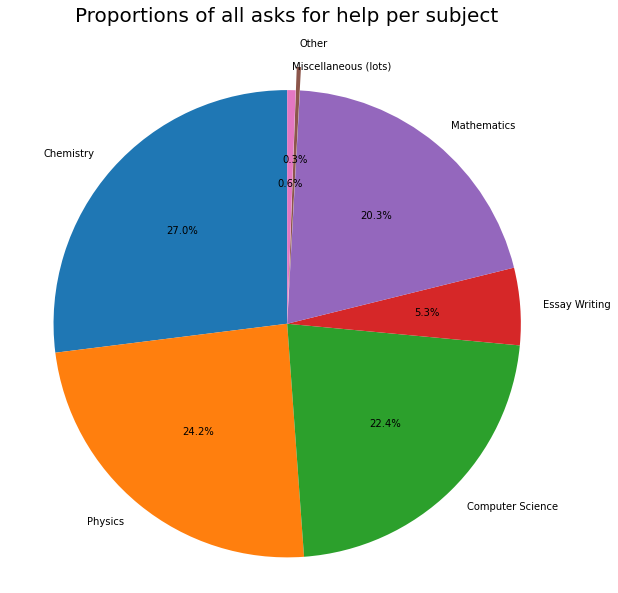

In [87]:
import matplotlib.pyplot as plt

explode = (0,0,0,0,0,0.1,0)
labels = 'Chemistry', 'Physics', 'Computer Science', 'Essay Writing', 'Mathematics', 'Other', 'Miscellaneous (lots)'
sizes_asks = []
for k, v in dict_of_proportions_overall.items():
    sizes_asks.append(v[0])
fig1, ax1 = plt.subplots()
ax1.pie(sizes_asks, explode = explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportions of all asks for help per subject", fontsize=20, fontweight=20, color='black', loc='center', pad=20)
ax1.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

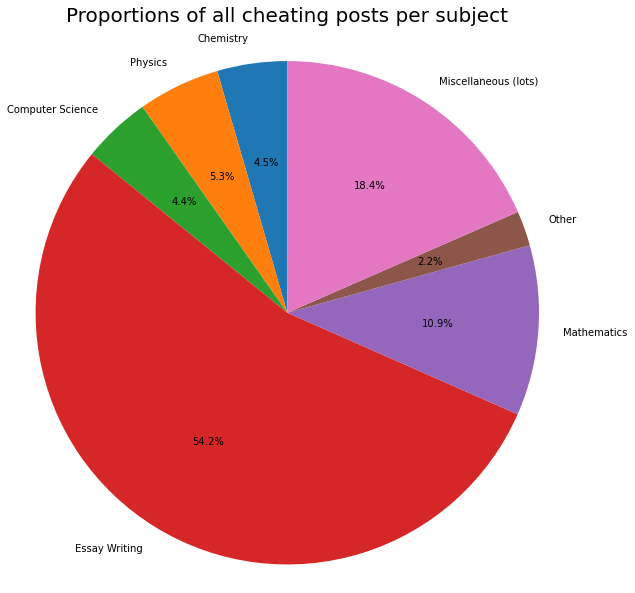

In [91]:
labels = 'Chemistry', 'Physics', 'Computer Science', 'Essay Writing', 'Mathematics', 'Other', 'Miscellaneous (lots)'
sizes_cheats = []
for k, v in dict_of_proportions_overall.items():
    sizes_cheats.append(v[1])
fig1, ax1 = plt.subplots()
ax1.pie(sizes_cheats, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportions of all cheating posts per subject", fontsize=20, fontweight=20, color='black', loc='center', pad=20)
ax1.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.show()

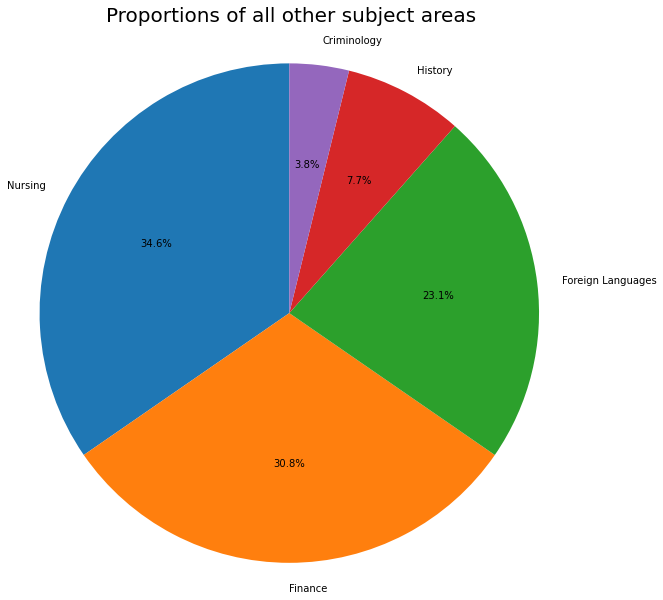

In [92]:
labels = 'Nursing', 'Finance', 'Foreign Languages', 'History', 'Criminology'
sizes_others = [9, 8, 6, 2, 1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes_others, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportions of all other subject areas", fontsize=20, fontweight=20, color='black', loc='center', pad=20)
ax1.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

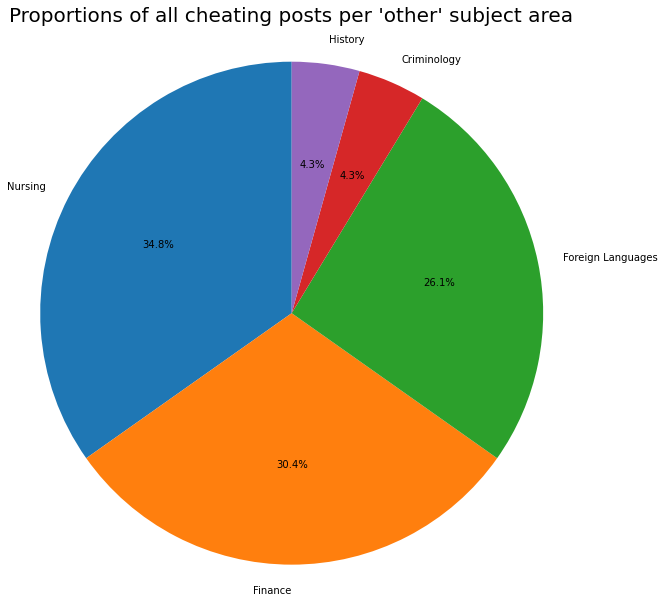

In [94]:
labels = 'Nursing', 'Finance', 'Foreign Languages', 'Criminology', 'History'
sizes_others_cheats = [8, 7, 6, 1, 1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes_others_cheats, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportions of all cheating posts per 'other' subject area", fontsize=20, fontweight=20, color='black', loc='center', pad=20)
ax1.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()